# Random Forest ALGO

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car_evaluation/car.data')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.columns = col_names

In [8]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
 df.describe(include='all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [11]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
oe = OrdinalEncoder()

In [15]:
df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [16]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [17]:
X = df.iloc[:, 0: -1]
y = df.iloc[:, -1]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RFC = RandomForestClassifier()

In [22]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
pred1 = RFC.predict(X_test)

In [24]:
pred1

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       0., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 3., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 3., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 3.,
       2., 2., 0., 3., 0.

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print(accuracy_score(pred1, y_test))

0.9653179190751445


In [27]:
from yellowbrick.model_selection import validation_curve

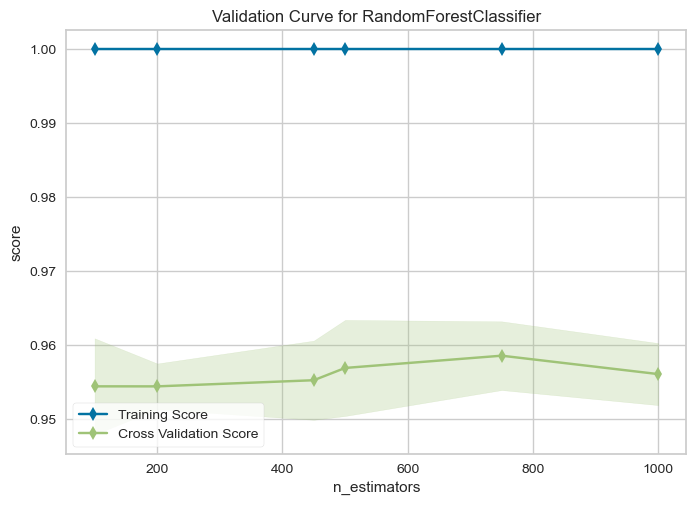

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [28]:
num_est = [100, 200, 450, 500, 750, 1000]
print(validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='n_estimators',
                       param_range=num_est, 
                       scoring='accuracy', cv=3))

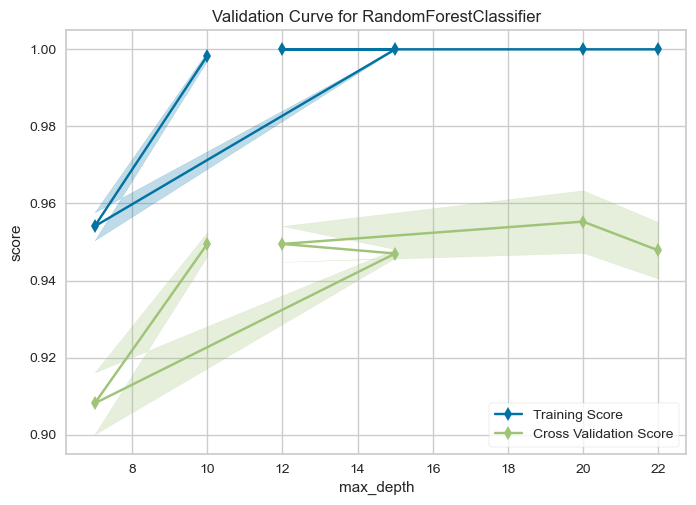

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [29]:
depth_val = [10, 7, 15, 12, 20, 22]
print(validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='max_depth',
                       param_range=depth_val, 
                       scoring='accuracy', cv=3))

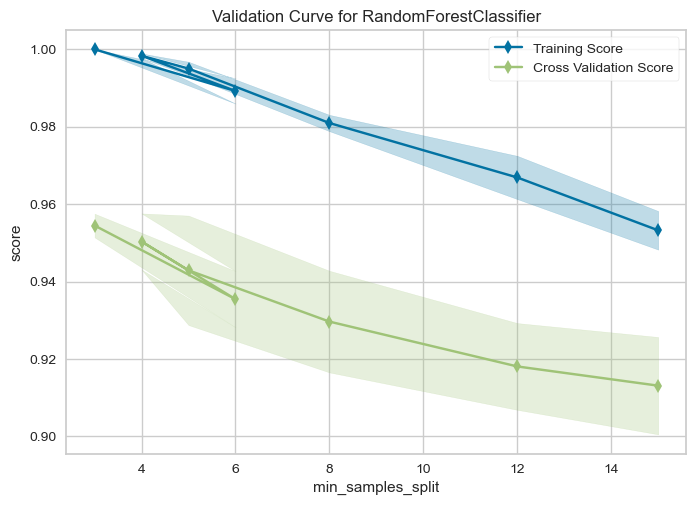

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [30]:
min_samples = [3, 6, 4, 5, 8, 12, 15]
print(validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='min_samples_split',
                       param_range=min_samples, 
                       scoring='accuracy', cv=3))

In [31]:
RFC2 = RandomForestClassifier(n_estimators = 1000, min_samples_split=3, max_depth=20, random_state=42)
RFC2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=1000,
                       random_state=42)

In [32]:
pred2 = RFC2.predict(X_test)

In [33]:
pred2

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       0., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 0., 3., 0.

In [34]:
print(accuracy_score(pred2, y_test))

0.9633911368015414


In [35]:
feature_scores = pd.Series(RFC2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.279566
persons     0.229201
buying      0.185016
maint       0.156538
lug_boot    0.083287
doors       0.066392
dtype: float64


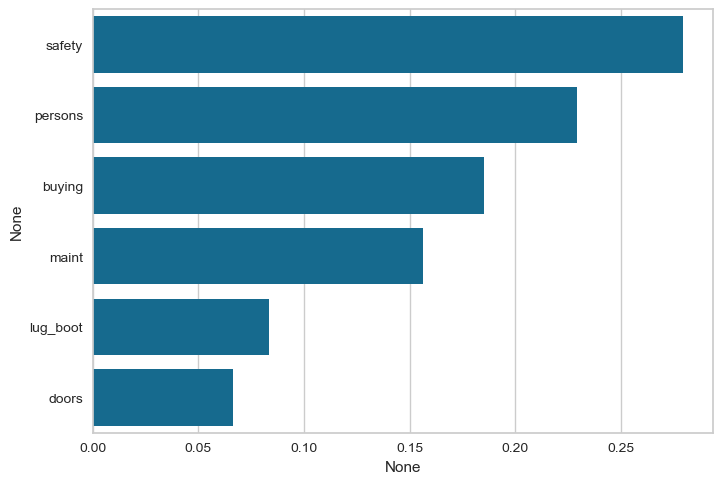

In [36]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.show()

In [37]:
RFC3 = RandomForestClassifier()

In [38]:
Xn = df.drop(['doors', 'lug_boot', 'maint'], axis=1)

In [39]:
yn = df['class']

In [42]:
X_trainn, X_testn, y_testn, y_trainn = train_test_split(Xn, yn, test_size=0.2)

In [43]:
RFC3.fit(X_trainn, y_trainn)
new_pred = RFC3.predict(X_testn)

ValueError: Found input variables with inconsistent numbers of samples: [1381, 346]